In [1]:
import pandas as pd
import duckdb as db
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# define sql function

def sql(sql_query: str) -> pd.DataFrame:
    return db.sql(sql_query).to_df()

In [3]:
# load data

covid_data = pd.read_csv('./covid_19_indonesia_time_series_all.csv')

In [4]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31822 entries, 0 to 31821
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         31822 non-null  object 
 1   Location ISO Code            31822 non-null  object 
 2   Location                     31822 non-null  object 
 3   New Cases                    31822 non-null  int64  
 4   New Deaths                   31822 non-null  int64  
 5   New Recovered                31822 non-null  int64  
 6   New Active Cases             31822 non-null  int64  
 7   Total Cases                  31822 non-null  int64  
 8   Total Deaths                 31822 non-null  int64  
 9   Total Recovered              31822 non-null  int64  
 10  Total Active Cases           31822 non-null  int64  
 11  Location Level               31822 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province        

In [5]:
# set pandas maximum columns display

pd.set_option('display.max_columns', None)

In [6]:
covid_data.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,City or Regency,Province,Country,Continent,Island,Time Zone,Special Status,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,-56,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,-54,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,2,Country,NaN,NaN,Indonesia,Asia,NaN,NaN,NaN,416,98.0,7230,8488.0,74953.0,1916907,265185520,138.34,113.921327,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,1,0,1,0,Province,NaN,Riau,Indonesia,Asia,Sumatera,UTC+07:00,NaN,10,2.0,169,268.0,1591.0,87024,6074100,69.80,101.805109,0.511648,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,-52,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.0,1.0


Data Preprocessing
---

In [6]:
# change the string format of table names

covid_data.columns = (
    covid_data.columns.str.lower()
    .str.replace(' ', '_')
    .str.replace('(', '')
    .str.replace(')', '')
)

In [7]:
covid_data.head()

,date,location_iso_code,location,new_cases,new_deaths,new_recovered,new_active_cases,total_cases,total_deaths,total_recovered,total_active_cases,location_level,city_or_regency,province,country,continent,island,time_zone,special_status,total_regencies,total_cities,total_districts,total_urban_villages,total_rural_villages,area_km2,population,population_density,longitude,latitude,new_cases_per_million,total_cases_per_million,new_deaths_per_million,total_deaths_per_million,total_deaths_per_100rb,case_fatality_rate,case_recovered_rate,growth_factor_of_new_cases,growth_factor_of_new_deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,-56,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,-54,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,2,Country,NaN,NaN,Indonesia,Asia,NaN,NaN,NaN,416,98.0,7230,8488.0,74953.0,1916907,265185520,138.34,113.921327,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,1,0,1,0,Province,NaN,Riau,Indonesia,Asia,Sumatera,UTC+07:00,NaN,10,2.0,169,268.0,1591.0,87024,6074100,69.80,101.805109,0.511648,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,-52,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.0,1.0


In [8]:
# drop unused columns

covid_data = (
    covid_data.drop([
        'city_or_regency',
        'province',
        'continent',
        'city_or_regency',
        'new_cases_per_million', 
        'total_cases_per_million', 
        'new_deaths_per_million', 
        'total_deaths_per_million', 
        'total_deaths_per_100rb'], axis= 1)
)

In [9]:
covid_data.head()

,date,location_iso_code,location,new_cases,new_deaths,new_recovered,new_active_cases,total_cases,total_deaths,total_recovered,total_active_cases,location_level,country,island,time_zone,special_status,total_regencies,total_cities,total_districts,total_urban_villages,total_rural_villages,area_km2,population,population_density,longitude,latitude,case_fatality_rate,case_recovered_rate,growth_factor_of_new_cases,growth_factor_of_new_deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,-56,Province,Indonesia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,51.28%,192.31%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,-54,Province,Indonesia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,48.78%,182.93%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,2,Country,Indonesia,NaN,NaN,NaN,416,98.0,7230,8488.0,74953.0,1916907,265185520,138.34,113.921327,-0.789275,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,1,0,1,0,Province,Indonesia,Sumatera,UTC+07:00,NaN,10,2.0,169,268.0,1591.0,87024,6074100,69.80,101.805109,0.511648,0.00%,100.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,-52,Province,Indonesia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,46.51%,174.42%,1.0,1.0


In [10]:
sql(
    """
    SELECT DISTINCT location_level
    FROM covid_data
    """
)

,location_level
0,Province
1,Country


In [11]:
# delete unused records

covid_data = covid_data.drop(covid_data[covid_data['location_level'] == 'Country'].index)

In [12]:
# confirm deletion

sql(
    """
    SELECT DISTINCT location_level
    FROM covid_data
    """
)

,location_level
0,Province


In [15]:
# convert column date's data type into datetime

covid_data['date'] = pd.to_datetime(covid_data['date'])

Data Time Range
---

In [20]:
sql(
    """
    SELECT 
        MIN(date) AS earliest_data,
        MAX(date) AS latest_data
    FROM covid_data
    """
)

,earliest_data,latest_data
0,2020-03-01,2022-09-15


Monthly Trends of New Cases in Each Province
---

In [21]:
new_cases_trend = sql(
    """
    SELECT 
        DATE_TRUNC('month', date) AS month,
        location,
        SUM(new_cases) AS total_new_cases
    FROM covid_data
    GROUP BY month, location
    ORDER BY month, location
    """
)
new_cases_trend.head(10)

,month,location,total_new_cases
0,2020-03-01,Aceh,5.0
1,2020-03-01,Bali,12.0
2,2020-03-01,Banten,79.0
3,2020-03-01,Bengkulu,1.0
4,2020-03-01,DKI Jakarta,371.0
5,2020-03-01,Daerah Istimewa Yogyakarta,11.0
6,2020-03-01,Jambi,2.0
7,2020-03-01,Jawa Barat,159.0
8,2020-03-01,Jawa Tengah,118.0
9,2020-03-01,Jawa Timur,106.0


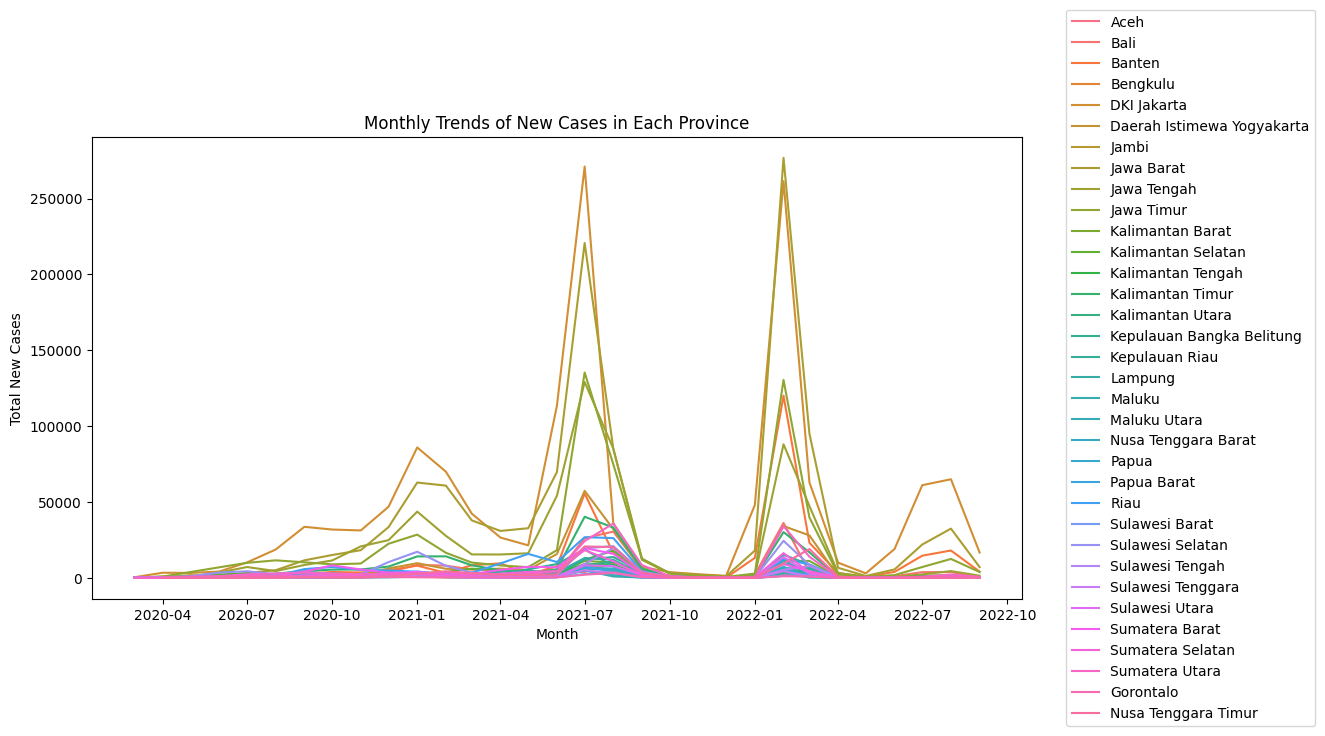

In [22]:
plt.figure(figsize= (12, 6))
sns.lineplot(data= new_cases_trend, x= 'month', y= 'total_new_cases', hue= 'location')
plt.xlabel('Month')
plt.ylabel('Total New Cases')
plt.title('Monthly Trends of New Cases in Each Province')
plt.legend(loc='center left', bbox_to_anchor=(1.04, 0.5), ncol=1)
plt.show()

Monthly Trends of New Cases in Each Island
---

In [23]:
new_cases_trend_by_island = sql(
    """
    SELECT 
        DATE_TRUNC('month', date) AS month,
        island,
        SUM(new_cases) AS total_new_cases
    FROM covid_data
    GROUP BY month, island
    ORDER BY month, island
    """
)

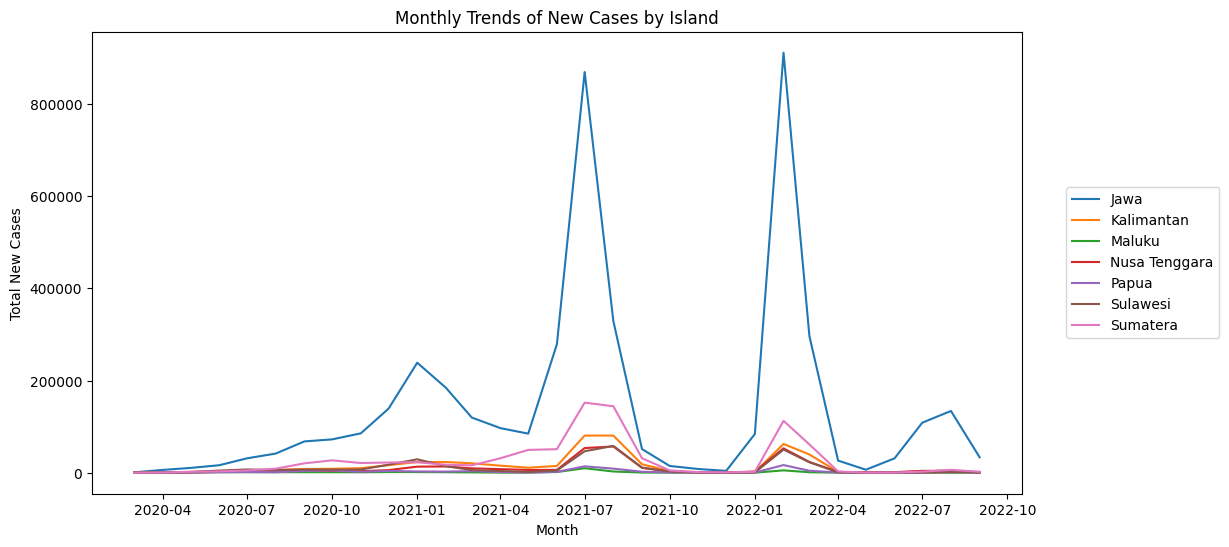

In [24]:
plt.figure(figsize= (12, 6))
sns.lineplot(data= new_cases_trend_by_island, x= 'month', y= 'total_new_cases', hue= 'island')
plt.xlabel('Month')
plt.ylabel('Total New Cases')
plt.title('Monthly Trends of New Cases by Island')
plt.legend(loc='center left', bbox_to_anchor=(1.04, 0.5), ncol=1)
plt.show()

Monthly Trends of New Cases in Java Island
---

In [25]:
jawa_new_cases_trend = sql(
    """
    SELECT 
        DATE_TRUNC('month', date) AS month,
        location,
        SUM(new_cases) AS total_new_cases
    FROM covid_data
    WHERE island = 'Jawa'
    GROUP BY month, location
    ORDER BY month, location
    """
)
jawa_new_cases_trend.head(10)

,month,location,total_new_cases
0,2020-03-01,Banten,79.0
1,2020-03-01,DKI Jakarta,371.0
2,2020-03-01,Daerah Istimewa Yogyakarta,11.0
3,2020-03-01,Jawa Barat,159.0
4,2020-03-01,Jawa Tengah,118.0
5,2020-03-01,Jawa Timur,106.0
6,2020-04-01,Banten,277.0
7,2020-04-01,DKI Jakarta,3390.0
8,2020-04-01,Daerah Istimewa Yogyakarta,83.0
9,2020-04-01,Jawa Barat,634.0


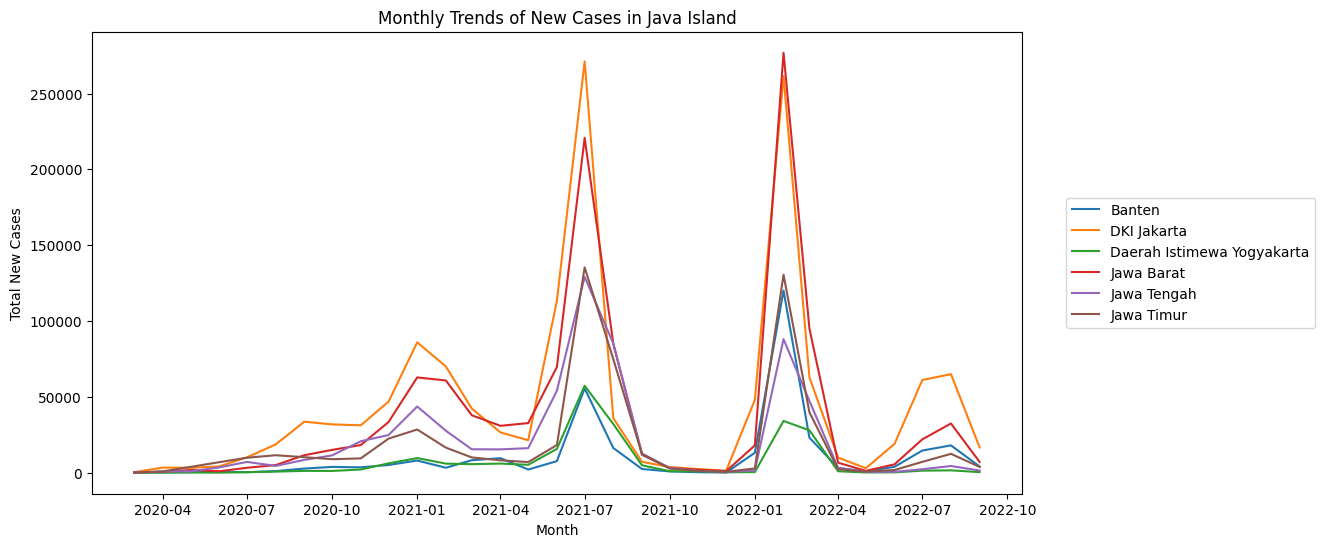

In [35]:
plt.figure(figsize= (12, 6))
sns.lineplot(data= jawa_new_cases_trend, x= 'month', y= 'total_new_cases', hue= 'location')
plt.xlabel('Month')
plt.ylabel('Total New Cases')
plt.title('Monthly Trends of New Cases in Java Island')
plt.legend(loc='center left', bbox_to_anchor=(1.04, 0.5), ncol=1)
plt.show()

Correlation Between COVID-19 Variables
---

In [32]:
corr_data = sql(
    """
    SELECT
        location,
        new_cases,
        new_deaths,
        population,
        population_density,
    FROM covid_data
    """
)

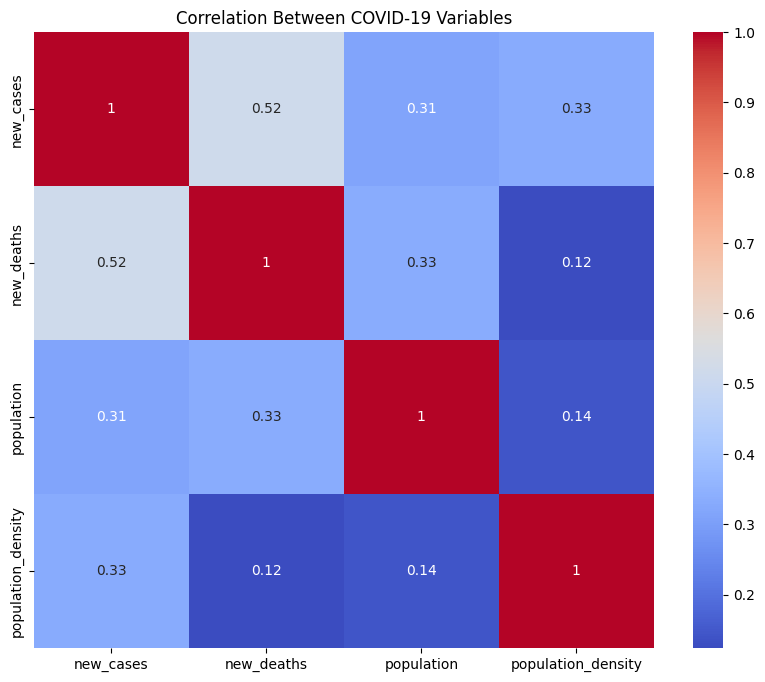

In [36]:
# Menghitung korelasi
corr = corr_data[['new_cases', 'new_deaths', 'population', 'population_density']].corr()

# Membuat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between COVID-19 Variables')
plt.show()

Geographic Analysis
---

In [39]:
import folium

In [40]:
geo_data = sql(
    """
    SELECT
        location,
        MAX(total_cases) AS total_cases,
        AVG(latitude) AS latitude,
        AVG(longitude) AS longitude
    FROM covid_data
    GROUP BY location;
    """
)

In [42]:
# Create a map

m = folium.Map(location=[geo_data['latitude'].mean(), geo_data['longitude'].mean()], zoom_start=5)

# Add markers for each province

for i, row in geo_data.iterrows():
    folium.Circle(
        location=[row['latitude'], row['longitude']],
        radius=row['total_cases']/25 ,  
        color='crimson',  
        fill=True,
        fill_color='crimson',  
        tooltip=f"{row['location']}: {row['total_cases']} cases",  
    ).add_to(m)

# show map
m

Total Cases vs Population Density
---

In [43]:
cases_vs_popdens = sql(
    """
    SELECT 
        location,
        MAX(total_cases) total_cases,
        AVG(population_density) as population_density
    FROM covid_data
    GROUP BY location
    ORDER BY total_cases DESC
    """
)

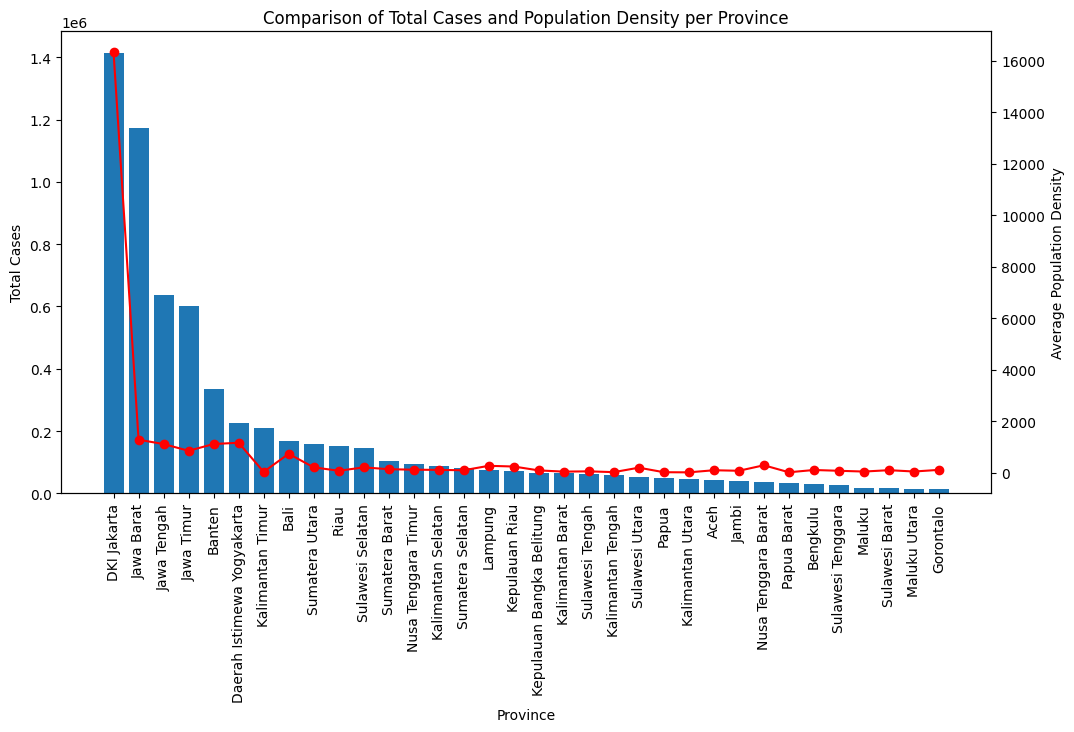

In [46]:
# Create bar plots and line plot overlay

fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plots for max_total_cases

ax1.bar(cases_vs_popdens['location'], cases_vs_popdens['total_cases'])
ax1.set_xlabel('Province')
ax1.set_ylabel('Total Cases')
ax1.tick_params(axis='x', rotation=90)

# Line plot overlay for avg_population_density

ax2 = ax1.twinx()
ax2.plot(cases_vs_popdens['location'], cases_vs_popdens['population_density'], color='r', marker='o')
ax2.set_ylabel('Average Population Density')

plt.title('Comparison of Total Cases and Population Density per Province')
plt.show()